Estimate load at particular hour on 33/11KV substation based on load at same time but previous day. Consider momentum + SGD optimizer. 
Dataset : Active power load dataset. 
Write a python code to build simple linear regression model using momentum + SGD optimizer.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

**Read data**

In [3]:
data=pd.read_excel("Load_Data_in_kW.xlsx",header=None)
data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [5]:
z=np.abs(stats.zscore(data))
print(z)

[[0.04910416]
 [0.08229029]
 [0.08782131]
 ...
 [0.09743692]
 [0.07253822]
 [0.03181432]]


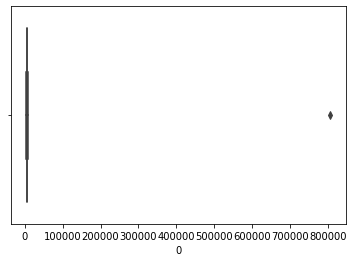

In [6]:
sns.boxplot(x=data[0])

In [7]:
df=data
q=df[0].quantile(0.99)
df[df[0]<q]
q_low=df[0].quantile(0.01)
q_hi=df[0].quantile(0.99)
df_filtered=df[(df[0]<q_hi)&(df[0]>q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [8]:
print(len(data))
print(len(df_filtered))
if(len(data)==len(df_filtered)):
  print('No outliers')

2184
2140


**Normalisation**

In [9]:
data=df_filtered
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


**Split** **data**

In [20]:
train_data,test_data=train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

1926


,0
1420,0.274092
1680,0.676188
957,0.369327
1881,0.701097
2140,0.190308


In [21]:
x=[]
y=[]
for i in range(len(train_data.iloc[:,0])-24):
  x.append(train_data.iloc[i,0])
  y.append(train_data.iloc[i+24,0])

**Train** **Data**

In [23]:
m=1
c=-1
epochs=100  # epochs
l=0.1      # learning rate
ns=len(x)
gama=0.9
vm=0
vc=0
err=[]
for i in range(epochs):
  er=0
  for j in range(len(x)):
    er+=((y[j]-(m*x[j])-c))**2
    gm=((-1.0)*(y[j]-m*x[j]-c)*(x[j]))
    gc=((-1.0)*(y[j]-m*x[j]-c))
    vm=(gama*vm)-(l*gm)
    vc=(gama*vc)-(l*gc)
    m=m+vm
    c=c+vc
    er=(1/(2*len(x)))*(er)
    err.append(er)
print("The local minimum occurs at m =%.2f"%(m),", c = %.2f"%(c))

The local minimum occurs at m =-0.16 , c = 0.60


**MSE,RMSE,MAE for Training data :**

In [24]:
yp=[]
for i in range(len(x)):
  p=m*x[i]+c
  yp.append(p)
sum=0
s1=0
for i in range(len(x)):
  sum+=(y[i]-yp[i])**2
  s1+=y[i]-yp[i]
mse=sum/len(x)
mae=s1/len(x)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root mean square error for training data (RMSE) : ",mse**0.5)
print("Mean Absolute Error for training data (MAE) : ",mae)

Mean Square Error for training data (MSE) :  0.04887422092524455
Root mean square error for training data (RMSE) :  0.22107514768794015
Mean Absolute Error for training data (MAE) :  -0.05752355387692156


Text(0.5, 1.0, 'Predicted data vs Actual data')

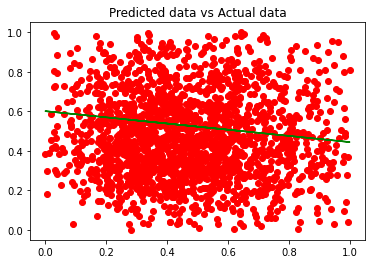

In [25]:
plt.plot(np.array(x),np.array(yp),'green')
plt.scatter(np.array(x),np.array(y),color='red')
plt.title("Predicted data vs Actual data")

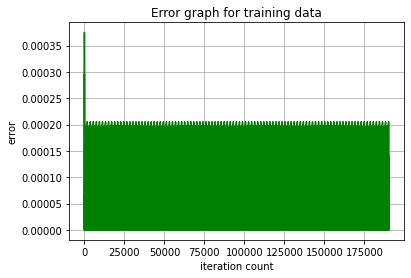

In [26]:
iters=np.arange(epochs*len(x))
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

**Testing** **Data :**

In [29]:
tx=[]
ty=[]
for i in range(len(test_data.iloc[:,0])-24):
    tx.append(test_data.iloc[i,0])
    ty.append(test_data.iloc[i+24,0])

yp1=[]
for i in range(len(tx)):
  p1=m*tx[i]+c
  yp1.append(p1)
sum=0
s2=0
for i in range(len(tx)):
  sum+=(ty[i]-yp1[i])**2
  s2+=ty[i]-yp1[i]
mse1=sum/len(tx)
mae1=s2/len(tx)
print("Mean Square Error for testing data (MSE) : ",mse1)
print("Root Mean Square Error for testing data (RMSE) : ",mse1**0.5)
print("Mean Absolute Error for testing data (MAE) : ",mae1)

Mean Square Error for testing data (MSE) :  0.04213951237968334
Root Mean Square Error for testing data (RMSE) :  0.2052791084832632
Mean Absolute Error for testing data (MAE) :  -0.04880331793856492


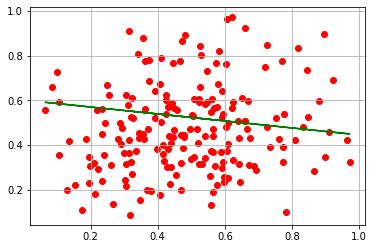

In [30]:
plt.scatter(tx,ty,color='red')
plt.plot(tx,yp1,'green')
plt.grid()

**Predict** **Output**

In [31]:
x_max=y_max= 8841.669480
x_min=y_min= 3377.919600
x2= float(input("Enter load of previous hour : "))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Load at hour based on its previous hour {} is : {}".format(x2,yi))

Enter load of previous hour : 5138.896
Load at hour based on its previous hour 5138.896 is : 6385.139154917786
